# 機械学習のとてもシンプルな例

pythonで機械学習を試してみる際に最も便利なツールが`scikit-learn`です。このパッケージには代表的なデータセットやその分析方法が含まれています。まずは、一番有名なボストンの住宅価格のデータセットを見てみましょう。

The most useful tool for experimenting with machine learning in python is `scikit-learn`. This package contains typical datasets and their analysis methods. First, let's look at the most famous dataset, Boston housing prices.

In [28]:
from sklearn import datasets

dset=datasets.load_boston()

/Users/emi/miniforge3/envs/dev_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

データセットは辞書型で格納されています。

The dataset is stored in a dictionary type.

In [29]:
dset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

`data`には住宅価格に関係しそうなものの数値が収められています。それぞれの数値が何に対応するかは`feature_names`にかかれています。

The `data` contains the numerical values of the items that may be related to housing prices. What each number corresponds to is described in `feature_names`.

In [30]:
dset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

この単語を見てもなんだかよくわかりませんが、`CRIM`は犯罪率、`ZN`は広い住宅が占める割合、`INDUS`は非小売業の割合、`CHAS`は川に面しているかどうか、`NOX`はNox濃度、`RM`は平均部屋数、`AGE`は古い家の割合、`DIS`は主要施設への距離、`RAD`は高速道路へのアクセス性、`TAX`は固定資産税率、`PTRATIO`は生徒と先生の割合、`B`は黒人の住人の割合、`LSTAT`は低所得者人口の割合です。（ちょっと倫理的にどうかという指標も含まれているので、このデータセットは将来的には削除されるようですが、メジャーなものとして例で取り上げている文献も多いので、今回はこれを例にあげます）

`CRIM` is crime rate, `ZN` is percentage of large homes, `INDUS` is percentage of non-retail, `CHAS` is river frontage, `NOX` is Nox concentration, `RM` is average number of rooms, `AGE` is percentage of older homes, `DIS` is distance to major distance to major facilities, `RAD` is highway accessibility, `TAX` is property tax rate, `PTRATIO` is student to teacher ratio, `B` is percentage of black residents, `LSTAT` is percentage of low-income population. (This data set will be removed from scikit-learn in the future, as it contains indicators that are a bit unethical, but many in the literature have taken it up in examples as a major one, so we will use it as an example in this case.)

`target`には実際の価格の情報が収められています。

The `target` contains the actual price information.

典型的な機械学習タスクは、いくつかの指標のデータを元に、住宅価格を予測するモデルを作ることです。指標を見ると、部屋数が多く、犯罪率が低いエリアにある方が住宅価格が高くなりそうな予想が立てられます。

A typical machine learning task is to create a model that predicts housing prices based on data from several indicators. The indicators predict that housing prices are likely to be higher in areas with more rooms and lower crime rates.

まずはそういった予想が筋が良さそうかを見てみましょう

First, let's see if such a forecast seems reasonable.

scikit-learnの辞書型そのままで扱うのは面倒なので、pandasのデータフレームというものに変換します。pandasは表形式のデータを扱うための便利なライブラリです。データフレームというのはそのpandasの使うデータ形式の一つです。また、住宅価格の情報もデータフレームに加えてしまいます。

Here we convert the data to pandas DataFrame. `pandas` is a convenient library for handling tabular data. Pandas is a convenient library for handling tabular data, and data frames are one of the data formats used by pandas. We also add home price information to the data frame.

In [31]:
import pandas as pd 
import numpy as np

# create DataFrame from data and set column name = feature_names
df=pd.DataFrame(dset.data, columns=dset.feature_names)
df['PRICE'] = np.array(dset.target)

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


どの変数が住宅価格と相関が強いかをペアプロットで見てみましょう。

Let's look at a paired plot to see which variables are highly correlated with housing prices.

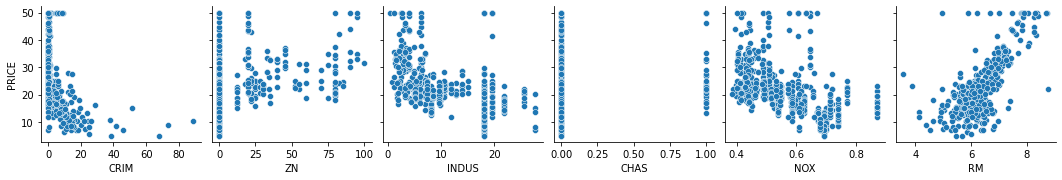

In [33]:
# seaborn is a package of plotting graph
import seaborn as sns
import matplotlib.pyplot as plt 
sns.pairplot(df, x_vars=df.columns[0:6], y_vars=['PRICE'])
plt.show()

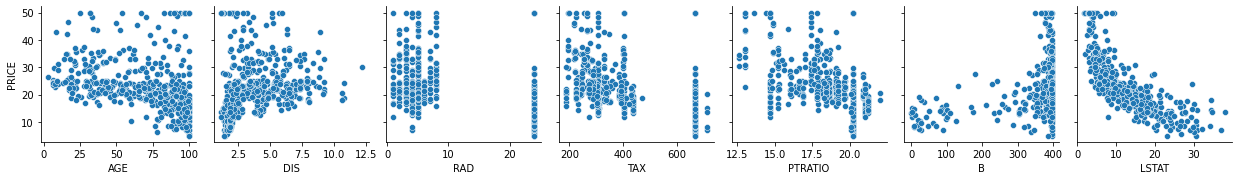

In [34]:
sns.pairplot(df, x_vars=df.columns[6:13], y_vars=['PRICE'])
plt.show()

明らかに相関があるのは`CRIM`, `RM`, `LSTAT`です。この3変数から住宅価格を予想するモデルを作ってみましょう。

Clearly correlated are `CRIM`, `RM` and `LSTAT`. Let's make a model to predict house prices from these three variables.

In [35]:
data=df.loc[:,['CRIM','RM','LSTAT']].values
target=df['PRICE'].values

どのような形の配列になっているかを見てみましょう。

Let's take a look at how the array is shaped.

In [36]:
data.shape, target.shape

((506, 3), (506,))

さて、モデルの構築ですが、まずは線形回帰モデルを試しましょう。

Now, to build the model, let's first try a linear regression model.

$$
y=ax_1+bx_2+cx_3
$$

のように3つの変数の線形和で価格が書けると考え、a,b,cの最適な値を最小二乗法で求めるという方法です。これも広義での機械学習に相当します。

This method is based on the idea that the price can be written as a linear sum of three variables, and the optimal values of a, b, and c are found by the least-squares method. This also corresponds to machine learning in a broad sense.

最適化した値が、学習に使ったデータ以外でも妥当なものかどうか（汎化性能）は機械学習タスクにおいてとても重要です。なので、事前に学習するデータと検証に使うデータを分けることを行います。
今回は1/4のデータを検証用に取っておきます。

Whether the optimized values are valid for data other than that used for training (generalization performance) is very important in machine learning tasks. Therefore, we separate the data to be trained from the data to be used for validation in advance.
In this case, we will keep 1/4 of the data for validation.

In [37]:
from sklearn.model_selection import train_test_split

#random_state=0で乱数のシードを固定しています
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

線形回帰モデルを定義して`fit`で学習させます。

Define a linear regression model and train it with `fit`.

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

学習済みモデルの`predict`を使って、取っておいた検証データを使った予測価格を計算します。

Using the learned model `predict`, calculate the predicted price using the validation data you have saved.

In [39]:
y_pred=model.predict(X_test)

実際の値と予測値はどの様になっているでしょうか

What are the actual and predicted values?

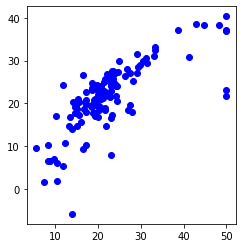

In [40]:
plt.axes().set_aspect('equal')
plt.scatter(y_test,y_pred,c='blue')

当てずっぽうよりは良いようだが…という感じですね。どれぐらい妥当なのかどうかを定量的に評価しましょう。代表的な評価指数としては、MSE（最小二乗誤差)が挙げられます

Quantitatively evaluate how reasonable it is. A typical evaluation index is the MSE (minimum squared error)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

35.96179836034815

もう一つは決定係数$R^2$です

$$
R^2=1-\frac{\sum_i (y_i-f_i)}{\sum_j (y_j-\bar{y})}
$$

$f_i$はモデルの予想値で、$y_i$が実際の値です。直感的には全部平均値で予想したときよりどれぐらいあたっているかということに相当しています。１に近いほど当てはまりが良いことを示しています。scikit-learnで作ったモデルにはscoreというメソッドがだいたい実装されていて、それを使うことでこの決定係数を計算できます

The $f_i$ are the model's predicted values and $y_i$ are the actual values. Intuitively, it corresponds to how much better the model is predicted to be than the average of all the predicted values, with a value closer to 1 indicating a better fit. You can use it to calculate this coefficient of determination

In [42]:
model.score(X_test, y_test)

0.5598258049067267

うーん、微妙ですね。

予測モデルを向上することを考えましょう。できそうなことは、使う変数を増やすこと、高度なモデルを使うこと、データに前処理を行うことです。

Consider improving your forecasting model. Things that could be done are to increase the number of variables used, use advanced models, and preprocess the data.

前処理+変数を増やすを試してみましょう。

Try pre-processing + more variables.

たとえば`CRIM`のデータは他より随分値が小さいのですが、このようにそれぞれの変数の大きさがあまりに違ってしまうと、機械学習モデルはうまく予想できないことが多々あります。大きさが大体同じぐらいになるように、変数ごとに正規化することが前処理としてよく行われます。

For example, the `CRIM` data is much smaller than the others, but if the sizes of each variable are too different, the machine learning model will often fail to make good predictions. It is often a pre-processing step to normalize each variable so that the sizes are roughly the same.

代表的な平均０分散１になるような正規化を行ってみましょう。

Let's normalize the data to be representative mean 0 variance 1.

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=df.copy()
df_scaled.iloc[:,0:-1]=scaler.fit_transform(df.iloc[:,0:-1])

In [44]:
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [45]:
data=df_scaled.loc[:,['CRIM','RM','LSTAT','ZN','AGE','DIS','NOX','RAD','PTRATIO']].values
target=df_scaled['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

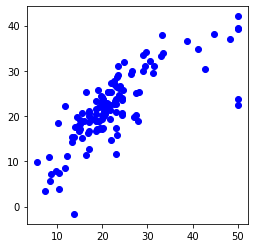

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
plt.axes().set_aspect('equal')
plt.scatter(y_test,y_pred,c='blue')

In [47]:
mean_squared_error(y_test, y_pred)

32.08436392069655

In [48]:
model.score(X_test, y_test)

0.6072857947103082

ちょっと向上しました

線形モデルの限界を感じるのでもうちょっと高度なモデルを試しましょう。有名なものとしてはサポートベクターマシン(SVR)やランダムフォレストなどがあります。

We can see the limitations of linear models, so let's try a more advanced model. Some well-known ones are Support Vector Machine (SVR) and Random Forest.

まずはサポートベクターマシンから

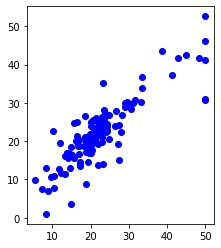

In [49]:
from sklearn.svm import SVR
model=SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
plt.axes().set_aspect('equal')
plt.scatter(y_test,y_pred,c='blue')


In [50]:
mean_squared_error(y_test, y_pred)

21.471867079010853

In [51]:
model.score(X_test, y_test)

0.7371832822722646

だいぶ良いですね

次にランダムフォレストを使ってみましょう。

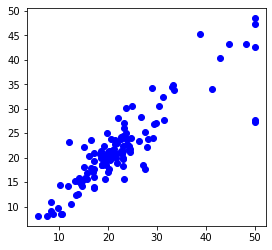

In [52]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
plt.axes().set_aspect('equal')
plt.scatter(y_test,y_pred,c='blue')

In [53]:
mean_squared_error(y_test, y_pred)

18.115718566929136

In [54]:
model.score(X_test, y_test)

0.7782627064744739

モデルの選択やデータの処理方法で予測性能が大きく変わってくることが実感できると思います。

You will notice that the choice of model and the way the data is processed can make a big difference in forecasting performance.